This notebook is part of the *orix* documentation https://orix.rtfd.io. Links to the documentation won’t work from the notebook.

# Crystal geometry

This notebook details how to create, perform operations with and plot directions
with respect to the crystal reference system using Miller indices with the
[orix.vector.Miller](reference.rst#orix.vector.Miller) class.

In [143]:
%matplotlib inline

from diffpy.structure import Lattice, Structure
import matplotlib.pyplot as plt
import numpy as np
from orix.crystal_map import Phase
from orix.quaternion import Orientation, Rotation, symmetry
from orix.vector import AxAngle, Miller, Vector3d


plt.rcParams.update({
    "figure.figsize": (7, 7),
    "font.size": 20,
    "axes.grid": True,
    "lines.markersize": 10,
    "lines.linewidth": 2,
})

## Basic crystallographic computations

Examples in this section, explaining basic crystallographic computations with
crystal lattice directions $uvw$ and crystal lattice planes $hkl$, are taken from
*Introduction to Conventional Transmission Electron Microscopy* (DeGraef, 2003).

Let's create a tetragonal crystal with lattice parameters $a$ = $b$ = 0.5 nm and
$c$ = 1 nm using `diffpy.structure.Lattice`

In [100]:
tetragonal = Phase(
    point_group="4",
    structure=Structure(lattice=Lattice(0.5, 0.5, 1, 90, 90, 90))
)
print(tetragonal)
print(tetragonal.structure.lattice)

<name: . space group: None. point group: 4. proper point group: 4. color: tab:blue>
Lattice(a=0.5, b=0.5, c=1, alpha=90, beta=90, gamma=90)


### Crystal lattice directions $[uvw]$

A crystal lattice direction $\mathbf{m} = u \cdot \mathbf{a} + v \cdot \mathbf{b} + w \cdot \mathbf{c}$
is a vector with coordinates $u, v, w$ with respect to the crystal axes $\mathbf{a}, \mathbf{b}, \mathbf{c}$,
and is denoted $[uvw]$.

The crystal's *direct metric tensor*

In [101]:
tetragonal.structure.lattice.metrics

array([[0.25, 0.  , 0.  ],
       [0.  , 0.25, 0.  ],
       [0.  , 0.  , 1.  ]])

Distance between the points (0.5, 0, 0.5) and (0.5, 0.5, 0) in nanometres

In [102]:
tetragonal.structure.lattice.dist([0.5, 0, 0.5], [0.5, 0.5, 0])

0.5590169943749475

Dot product in nanometres and the angle in degrees between vectors $[uvw]$ = [120] and
$[uvw]$ = [311]

In [103]:
m1 = Miller(uvw=[[1, 2, 0], [3, 1, 1]], phase=tetragonal)
m1

Miller (2,), point group 4, uvw
[[1. 2. 0.]
 [3. 1. 1.]]

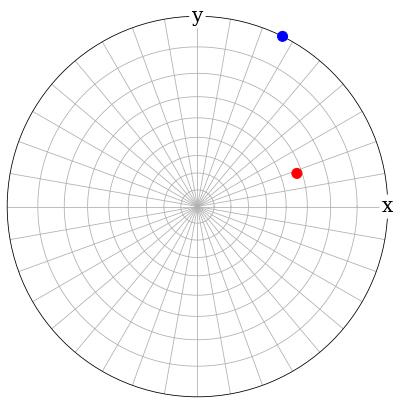

In [51]:
m1.scatter(axes_labels=["x", "y", None], c=["b", "r"])

In [104]:
m1[0].dot(m1[1]).data[0]

1.25

In [105]:
np.rad2deg(m1[0].angle_with(m1[1]).data[0])

53.300774775727874

### Crystal lattice planes $hkl$

A crystal lattice plane $(hkl)$ is described by its normal vector
$\mathbf{n} = h\cdot\mathbf{a^*} + k\cdot\mathbf{b^*} + l\cdot\mathbf{c^*}$,
where $\mathbf{a^*}, \mathbf{b^*}, \mathbf{c^*}$ are the reciprocal crystal
axes.

The crystal's *reciprocal metric tensor*

In [106]:
tetragonal.structure.lattice.reciprocal().metrics

array([[4., 0., 0.],
       [0., 4., 0.],
       [0., 0., 1.]])

In [107]:
m2 = Miller(hkl=m1.uvw, phase=tetragonal)
m2

Miller (2,), point group 4, hkl
[[1. 2. 0.]
 [3. 1. 1.]]

Dot product in nanometres and the angle in degrees between the lattice plane normals
$(hkl)$ = [120] and $(hkl)$ = [311]

In [108]:
m2[0].dot(m2[1]).data[0]

20.0

In [109]:
np.rad2deg(m2[0].angle_with(m2[1]).data[0])

45.698798295675644

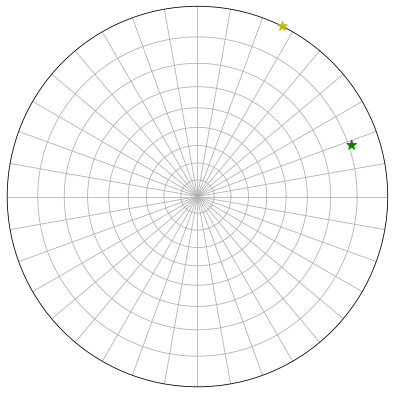

In [110]:
m2.scatter(c=["y", "g"], marker="*")

Note that $[uvw]$ is not always parallel to $(hkl)$ even if the indices are the
same

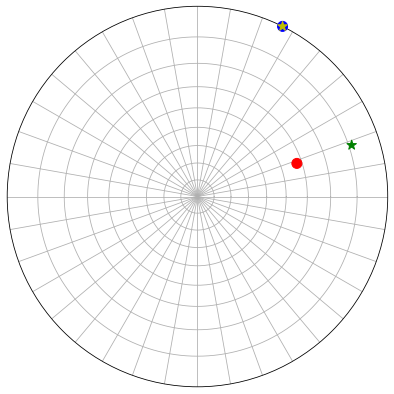

In [111]:
fig = m1.scatter(return_figure=True, c=["b", "r"])
m2.scatter(figure=fig, c=["y", "g"], marker="*")

The reciprocal components of the lattice vector [114] (i.e. which lattice plane
the [114] direction is perpendicular to)

In [112]:
m3 = Miller(uvw=[1, 1, 4], phase=tetragonal)
m3.hkl

array([[0.25, 0.25, 4.  ]])

The cross product of the lattice vectors [110] and [111] in the crystal

In [113]:
m4 = Miller(uvw=[[1, 1, 0], [1, 1, 1]], phase=tetragonal)
m4perp = m4[0].cross(m4[1])
m4perp

Miller (1,), point group 4, uvw
[[ 1. -1.  0.]]

We can plot these vectors and the cross product vector

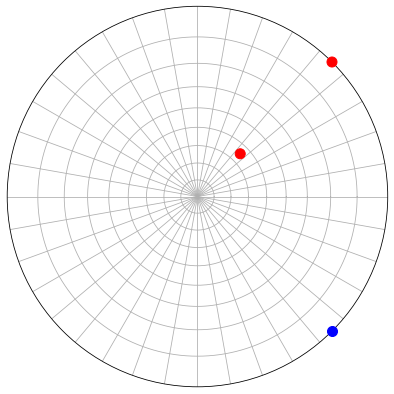

In [114]:
fig = m4.scatter(return_figure=True, c="r")
m4perp.scatter(figure=fig, c="b")

## Triclinic example

Examples in this and the following sections are inspired by MTEX' documentation
on [Miller indices](https://mtex-toolbox.github.io/CrystalDirections.html) and
[operations with these](https://mtex-toolbox.github.io/CrystalOperations.html).

Create a triclinic lattice

In [115]:
triclinic = Phase(
    point_group="-1",
    structure=Structure(lattice=Lattice(5.29, 9.18, 9.42, 90.4, 98.9, 90.1))
)
triclinic

<name: . space group: None. point group: -1. proper point group: 1. color: tab:blue>

In [116]:
m5 = Miller(uvw=[1, 0, 1], phase=triclinic)
print(m5)

m6 = Miller(hkl=[1, 0, 1], phase=triclinic)
print(m6)

Miller (1,), point group -1, uvw
[[1. 0. 1.]]
Miller (1,), point group -1, hkl
[[1. 0. 1.]]


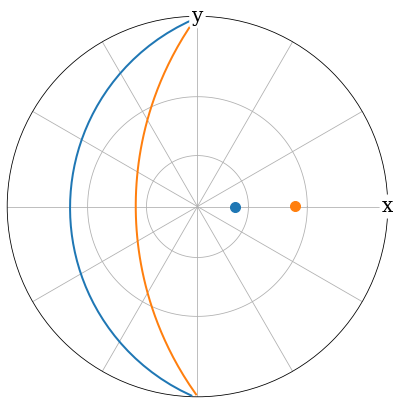

In [117]:
fig = m5.scatter(axes_labels=["x", "y", None], return_figure=True, grid_resolution=(30, 30))
m5.draw_circle(figure=fig, color="C0")
m6.scatter(figure=fig, c="C1")
m6.draw_circle(figure=fig, color="C1")

## Trigonal and hexagonal crystal directions and plane normals

Crystal lattice vectors and planes in lattices with trigonal and hexagonal
crystal symmetry are typically expressed in Miller-Bravais indices
$[UVTW]$ and $(hkil)$. The definition of $[UVTW]$ used in orix is

$$
(U, V, T, W) = (2u - v, 2v - u, -(u + v), 3w).
$$

The first three Miller indices always sum up to zero, i.e.

$$
U + V + T = 0,\\
h + k + i = 0.
$$

In [118]:
trigonal = Phase(
    point_group="321",
    structure=Structure(lattice=Lattice(4.9, 4.9, 5.4, 90, 90, 120))
)
trigonal

<name: . space group: None. point group: 321. proper point group: 32. color: tab:blue>

In [119]:
m7 = Miller(uvtw=[2, 1, -3, 1], phase=trigonal)
m7

Miller (1,), point group 321, uvtw
[[ 2.  1. -3.  1.]]

In [120]:
m8 = Miller(hkil=[1, 1, -2, 3], phase=trigonal)
m8

Miller (1,), point group 321, hkil
[[ 1.  1. -2.  3.]]

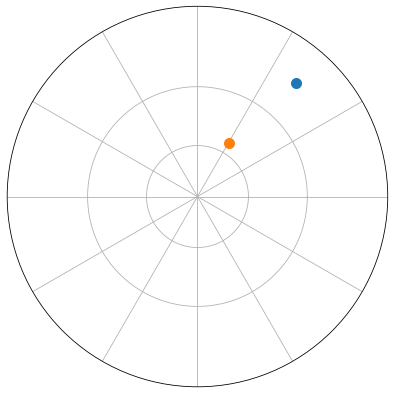

In [121]:
fig = m7.scatter(return_figure=True, c="C0", grid_resolution=(30, 30))
m8.scatter(figure=fig, c="C1")

One can change the coordinate format of the Miller class, but note that this
does not change the vector, since all vectors are stored with respect to the
cartesian coordinate system internally

In [122]:
print(m8, "\n\n", m8.data)

Miller (1,), point group 321, hkil
[[ 1.  1. -2.  3.]] 

 [[0.20408163 0.35347976 0.55555556]]


In [123]:
m8.coordinate_format = "uvtw"
print(m8, "\n\n", m8.data)

Miller (1,), point group 321, uvtw
[[ 0.0833  0.0833 -0.1666  0.3086]] 

 [[0.20408163 0.35347976 0.55555556]]


## Operations

In [124]:
m9 = Miller(hkil=[[1, -1, 0, 0], [1, 0, -1, 0]], phase=trigonal)
m9

Miller (2,), point group 321, hkil
[[ 1. -1. -0.  0.]
 [ 1.  0. -1.  0.]]

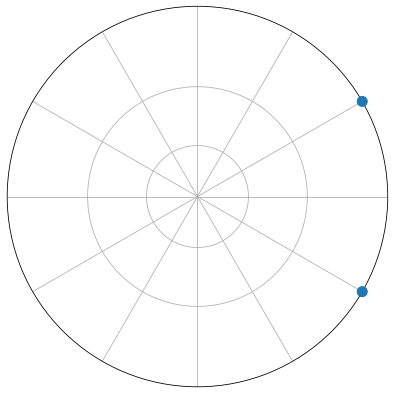

In [125]:
m9.scatter(grid_resolution=(30, 30))

### Zone axes

In [126]:
d1 = m9[0].cross(m9[1])
d1

Miller (1,), point group 321, hkil
[[ 0.      0.     -0.      0.2597]]

In [127]:
m10 = Miller(uvtw=[[0, 0, 0, 1], [1, -2, 1, 3]], phase=trigonal)

d2 = m10[0].cross(m10[1])
d2

Miller (1,), point group 321, uvtw
[[ 3.1177 -0.     -3.1177  0.    ]]

### Symmetrically equivalent crystal directions and planes

In [128]:
m11 = d2.symmetrise()
m11

Miller (6,), point group 321, uvtw
[[ 3.1177 -0.     -3.1177  0.    ]
 [-3.1177  3.1177 -0.      0.    ]
 [ 0.     -3.1177  3.1177  0.    ]
 [ 3.1177 -3.1177 -0.      0.    ]
 [ 0.      3.1177 -3.1177  0.    ]
 [-3.1177 -0.      3.1177  0.    ]]

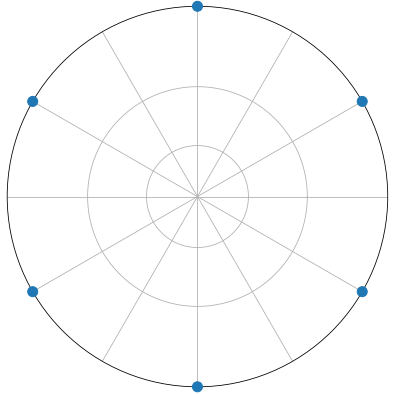

In [129]:
m11.scatter(grid_resolution=(30, 30))

In [130]:
m12 = Miller(
    hkil=[
        [1, 0, -1, 0],
        [1, 1, -2, 0],
        [1, 0, -1, 1],
        [1, 1, -2, 1],
        [0, 0, 0, 1]
    ],
    phase=trigonal
)
m12

Miller (5,), point group 321, hkil
[[ 1.  0. -1.  0.]
 [ 1.  1. -2.  0.]
 [ 1.  0. -1.  1.]
 [ 1.  1. -2.  1.]
 [ 0.  0. -0.  1.]]

In [131]:
m13, idx = m12.symmetrise(unique=True, return_index=True)

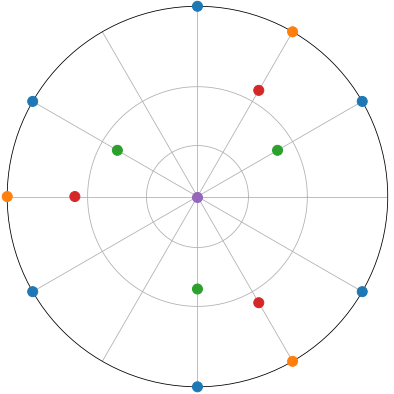

In [132]:
fig = m13[idx == 0].scatter(c="C0", return_figure=True, grid_resolution=(30, 30))
for i in range(1, m13.size):
    m13[idx == i].scatter(c=f"C{i}", figure=fig)

**TODO**: Overwrite Vector3d.angle_with()

In [133]:
o = Orientation.from_euler(np.deg2rad([10, 20, 30]))
o = o.set_symmetry(trigonal.point_group)
o

Orientation (1,) 1, 321
[[ 0.9254 -0.171   0.0302 -0.3368]]

In [134]:
m9[0]

Miller (1,), point group 321, hkil
[[ 1. -1. -0.  0.]]

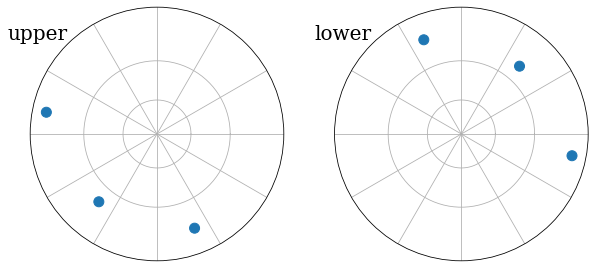

In [135]:
p = o * m9[0].symmetrise()

p.scatter(
    hemisphere="both",
    figure_kwargs=dict(figsize=(10, 20)),
    grid_resolution=(30, 30)
)

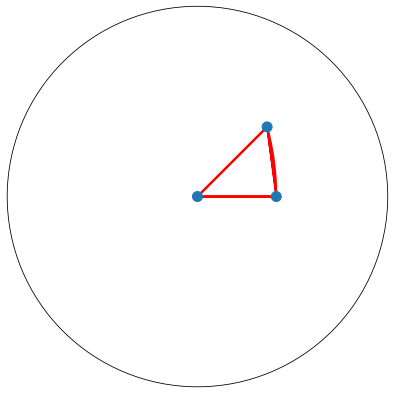

In [137]:
pg = symmetry.get_point_group(225)
#fs = pg.fundamental_sector()
fs = pg.fundamental_sector2()

fig = fs.vertices.scatter(return_figure=True, grid=False)
_ = fig.axes[0].plot(fs.edges.azimuth.data, fs.edges.polar.data, c="r")

**TODO**: Plot fundamental sector

**TODO**: Consecutive lines between SphericalRegion.edges' vectors

**TODO**: Miller.in_fundamental_sector

**TODO**: Fix maintaining grid bool after return_figure

**TODO**: Plotting of crystal symmetry element

**TODO**: Geometrical simulation of Kikuchi sphere for various crystal structures

## Diamond [111] pole figure

Let's make a pole figure in the [111] direction of the diamond structure, as
seen in
[this figure from Wikipedia](https://upload.wikimedia.org/wikipedia/commons/d/df/DiamondPoleFigure111.png)

![diamond_pf111](https://upload.wikimedia.org/wikipedia/commons/d/df/DiamondPoleFigure111.png)

The figure caption reads as follows

> *The spots in the stereographic projection show the orientation of lattice planes with the 111 in the center. Only poles for a non-forbidden Bragg reflection are shown between Miller indices -10 <= (h,k,l) <= 10. The green spots contain Miller indices up to 3, for example 111, 113, 133, 200 etc in its fundamental order. Red are those raising to 5, ex. 115, 135, 335 etc, while blue are all remaining until 10, such as 119, 779, 10.10.00 etc.*

In [138]:
diamond = Phase(space_group=227)
md = Miller.from_highest_indices(phase=diamond, uvw=[10, 10, 10])
md

Miller (9260,), point group m-3m, uvw
[[ 10.  10.  10.]
 [ 10.  10.   9.]
 [ 10.  10.   8.]
 ...
 [-10. -10.  -8.]
 [-10. -10.  -9.]
 [-10. -10. -10.]]

Remove duplicates under symmetry

In [139]:
md2 = md.unique(use_symmetry=True)
md2

Miller (450,), point group m-3m, uvw
[[ 1.  0.  0.]
 [ 2.  0.  0.]
 [ 3.  0.  0.]
 ...
 [10.  9.  9.]
 [10. 10.  9.]
 [10. 10. 10.]]

Symmetrise to get all symmetrically equivalent directions

In [140]:
md3 = md2.symmetrise(unique=True)
md3

Miller (16100,), point group m-3m, uvw
[[  1.   0.   0.]
 [  0.   1.   0.]
 [ -1.   0.   0.]
 ...
 [ 10.  10. -10.]
 [-10.  10. -10.]
 [-10. -10. -10.]]

Remove forbidden reflections in face-centered cubic structures (all hkl must be
all even or all odd)

In [141]:
selection = np.sum(np.mod(md3.hkl, 2), axis=1)
allowed = np.array([i not in [1, 2] for i in selection], dtype=bool)
md4 = md3[allowed]
md4

Miller (3530,), point group m-3m, uvw
[[  2.   0.   0.]
 [  0.   2.   0.]
 [ -2.   0.   0.]
 ...
 [ 10.  10. -10.]
 [-10.  10. -10.]
 [-10. -10. -10.]]

Assign colors to each class of vectors as per the description on Wikipedia

In [142]:
uvw = np.abs(md4.uvw)
green = np.all(uvw <= 3, axis=-1)
red = np.any(uvw > 3, axis=-1) * np.all(uvw <= 5, axis=-1)
blue = np.any(uvw > 5, axis=-1)
rgb_mask = np.column_stack([red, green, blue])

# Sanity check
print(np.count_nonzero(rgb_mask) == md4.size)

True


Rotate directions so that [111] impinges the unit sphere in the north pole
(out of plane direction)

In [144]:
vz = Vector3d.zvector()
v111 = Vector3d([1, 1, 1])
r1 = Rotation.from_neo_euler(AxAngle.from_axes_angles(
    v111.cross(vz), v111.angle_with(vz).data)
)
r2 = Rotation.from_neo_euler(AxAngle.from_axes_angles(vz, np.deg2rad(-15)))
md5 = r2 * r1 * md4

Restrict to upper hemisphere and remove duplicates

In [145]:
is_upper = md5.z > 0
md6 = md5[is_upper]
rgb_mask = rgb_mask[is_upper]

_, idx = Vector3d(md6.unit).unique(return_index=True)
md7 = md6[idx]
rgb_mask = rgb_mask[idx]

**TODO**: Override Miller.unit?

Finally, plot the vectors

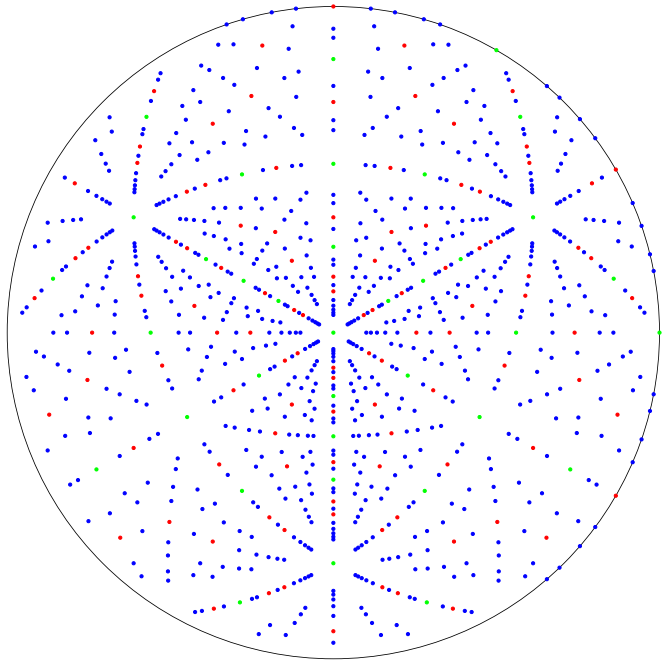

In [146]:
rgb = np.zeros_like(md7.uvw)
rgb[rgb_mask] = 1

md7.scatter(c=rgb, s=10, grid=False, figure_kwargs=dict(figsize=(12, 12)))